In [24]:
#데이터 처리 및 조작
import pandas as pd #데이터프레임(DataFrame) 형태로 데이터를 다룰 때 사용
#데이터 분할 및 모델 평가
from sklearn.model_selection import train_test_split #데이터를 훈련 세트와 테스트 세트로 분할
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # 모델 평가 지표
#머신러닝 모델
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트 분류 알고리즘
# 데이터 불균형 처리
from imblearn.over_sampling import SMOTE # SMOTE(Synthetic Minority Oversampling Technique)로 데이터 불균형 해결
#데이터 시각화
import matplotlib.pyplot as plt # 데이터 시각화를 위한 기본 라이브러리
import seaborn as sns # 고급 데이터 시각화를 위한 라이브러리
#데이터 전처리
from sklearn.preprocessing import LabelEncoder # 범주형 데이터를 숫자로 변환 (레이블 인코딩)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

#1. 데이터 로드
#CSV 파일을 pandas 데이터프레임으로 로드
data = pd.read_csv('./dataset/heart_disease.csv')


In [3]:
#데이터 샘플 확인
print("데이터 샘플:")
print(data.head()) # 데이터 상위 5개 행 출력

데이터 샘플:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0 56.00    Male          153.00             155.00            High     Yes   
1 69.00  Female          146.00             286.00            High      No   
2 46.00    Male          126.00             216.00             Low      No   
3 32.00  Female          122.00             293.00            High     Yes   
4 60.00    Male          166.00             242.00             Low     Yes   

  Family Heart Disease Diabetes   BMI High Blood Pressure  ...  \
0                  Yes       No 24.99                 Yes  ...   
1                  Yes      Yes 25.22                  No  ...   
2                   No       No 29.86                  No  ...   
3                  Yes       No 24.13                 Yes  ...   
4                  Yes      Yes 20.49                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium

In [4]:
#결측값 확인 및 처리
print(data.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [5]:
data = data.dropna() # 결측값 제거

In [6]:
# 결측값 확인 및 처리
print(data.isnull().sum())

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


In [7]:
#데이터 기본 정보 확인
print("\n데이터 정보:")
print(data.info()) # 각 열의 데이터 유형 및 결측치 확인


데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 7067 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7067 non-null   float64
 1   Gender                7067 non-null   object 
 2   Blood Pressure        7067 non-null   float64
 3   Cholesterol Level     7067 non-null   float64
 4   Exercise Habits       7067 non-null   object 
 5   Smoking               7067 non-null   object 
 6   Family Heart Disease  7067 non-null   object 
 7   Diabetes              7067 non-null   object 
 8   BMI                   7067 non-null   float64
 9   High Blood Pressure   7067 non-null   object 
 10  Low HDL Cholesterol   7067 non-null   object 
 11  High LDL Cholesterol  7067 non-null   object 
 12  Alcohol Consumption   7067 non-null   object 
 13  Stress Level          7067 non-null   object 
 14  Sleep Hours           7067 non-null   float64
 15  Sugar Consumption

In [8]:
# 1. 결측치 처리
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# 2. 범주형 데이터 인코딩
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# 3. 독립변수(X)와 종속변수(y) 분리
X = data.drop(columns=['Heart Disease Status'])
y = data['Heart Disease Status']

In [9]:
#4 데이터 분리(훈련 80%, 테스트 20%)

# 데이터 불균형 해결
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [10]:
#5. 랜덤 포레스트 포레스트 모델 정의 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
#6. 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 81.23%


In [12]:
#7. 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['질병 없음', '질병 있음']))


Classification Report:
              precision    recall  f1-score   support

       질병 없음       0.78      0.87      0.82      1146
       질병 있음       0.85      0.75      0.80      1107

    accuracy                           0.81      2253
   macro avg       0.82      0.81      0.81      2253
weighted avg       0.82      0.81      0.81      2253



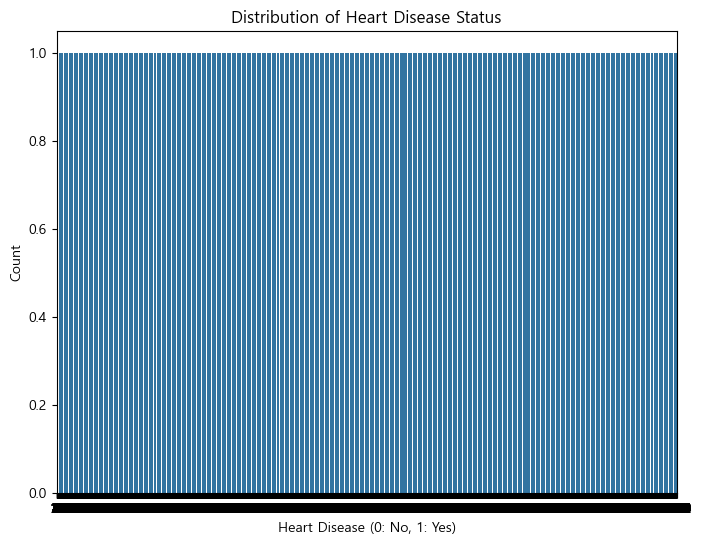

In [13]:
#타겟 변수 분포 확인
plt.figure(figsize=(8,6))
sns.countplot(data['Heart Disease Status'])
plt.title("Distribution of Heart Disease Status")
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

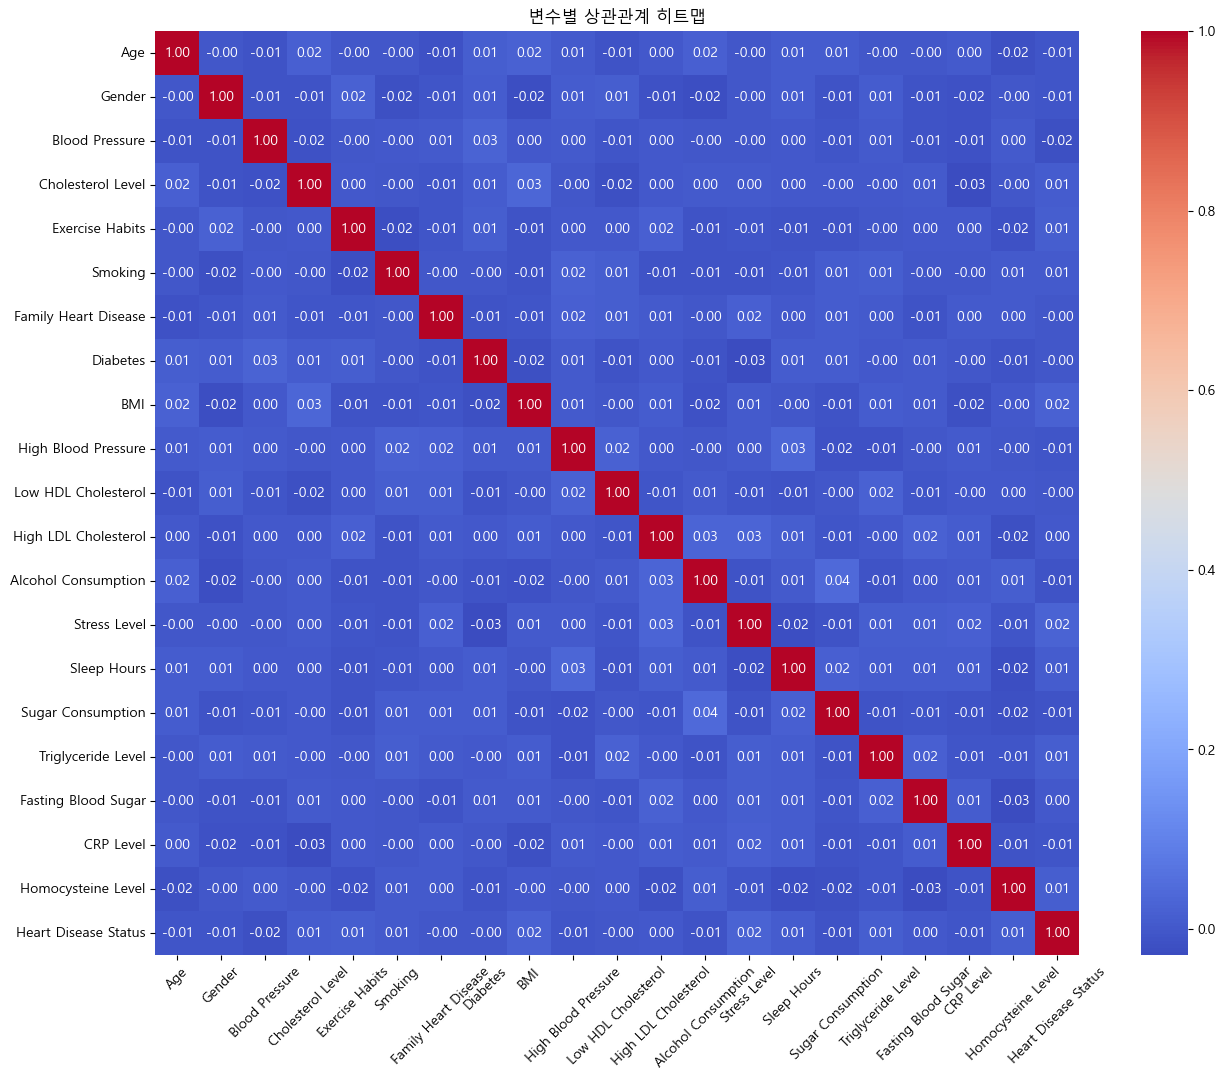

In [14]:

# 상관관계 히트맵
# 수치형 데이터만 추출
numeric_data = data.select_dtypes(include=['number'])  # 숫자형 데이터 추출

# 모든 변수의 상관관계 계산
correlation_matrix = numeric_data.corr()

# 히트맵 그리기
plt.figure(figsize=(16, 12))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.xticks(rotation=45)  # X축 레이블 45도 회전
plt.yticks(rotation=0)   # Y축 레이블 수평 유지
plt.title("변수별 상관관계 히트맵")
plt.show()

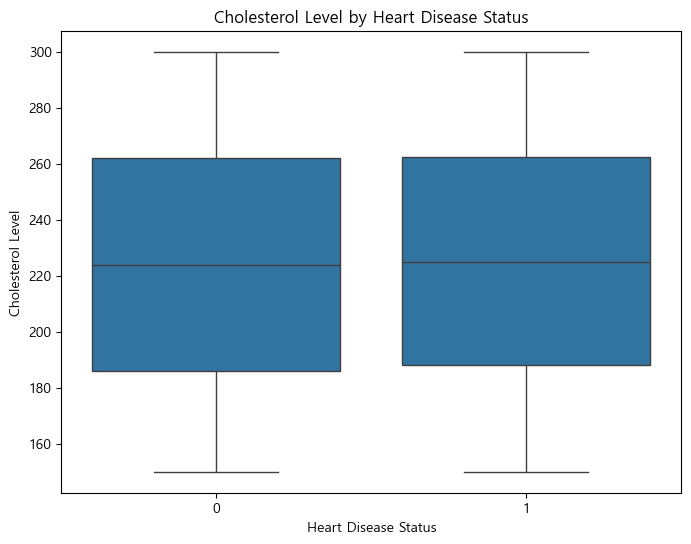

In [15]:
# 주요 변수 중 하나와 타겟 간의 관계 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Disease Status', y='Cholesterol Level', data=data)
plt.title("Cholesterol Level by Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Cholesterol Level")
plt.show()


분류 보고서 (Classification Report):
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1146
           1       0.85      0.75      0.80      1107

    accuracy                           0.81      2253
   macro avg       0.82      0.81      0.81      2253
weighted avg       0.82      0.81      0.81      2253



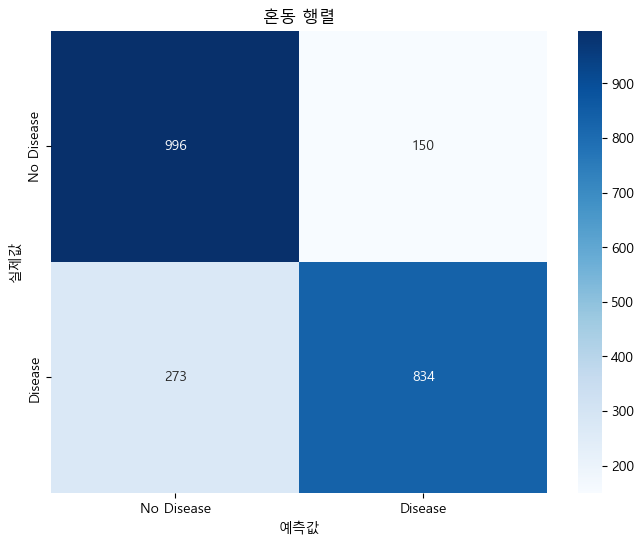

In [16]:
# 정밀도, 재현율, F1 점수 등을 포함한 상세 평가
print("\n분류 보고서 (Classification Report):")
print(classification_report(y_test, y_pred))

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("혼동 행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# 해석
# True Negative (TN):

# 값: 1378
# 실제로 심장병이 없는(No Disease) 데이터를 모델이 정확히 No Disease로 예측한 경우.
# 모델이 잘 작동한 부분.
# False Positive (FP):

# 값: 226
# 실제로 심장병이 없는(No Disease) 데이터를 모델이 잘못 Disease로 예측한 경우.
# **오경보(잘못된 경고)**에 해당하며, 이 경우 불필요한 추가 검사나 치료가 발생할 수 있음.
# False Negative (FN):

# 값: 451
# 실제로 심장병이 있는(Disease) 데이터를 모델이 잘못 No Disease로 예측한 경우.
# **누락된 경보(위험 상황 미탐지)**로, 이 경우 치료가 지연될 수 있음.
# True Positive (TP):

# 값: 1145
# 실제로 심장병이 있는(Disease) 데이터를 모델이 정확히 Disease로 예측한 경우.
# 모델이 잘 작동한 부분.


In [17]:
print(data['Heart Disease Status'].value_counts())

Heart Disease Status
0    5632
1    1435
Name: count, dtype: int64


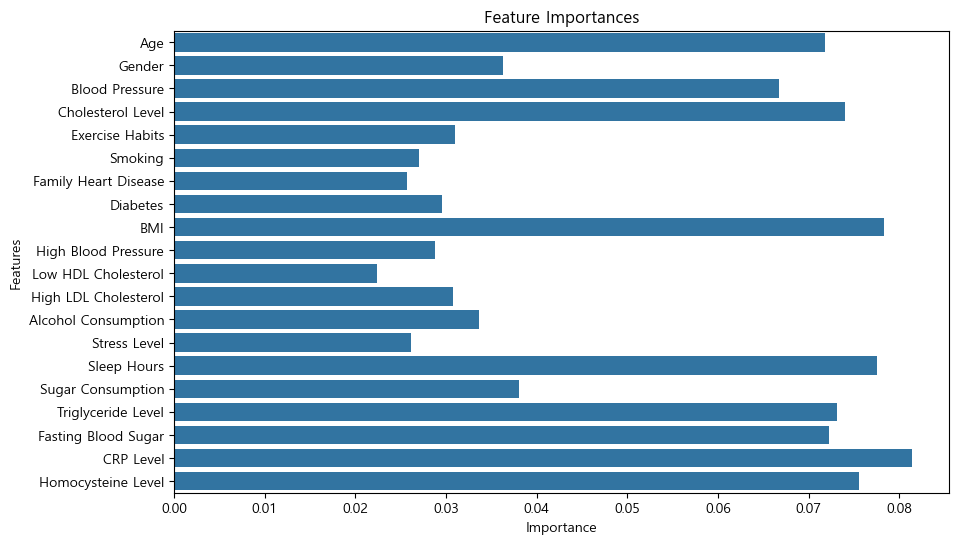

In [18]:
# 랜덤 포레스트 모델의 특성 중요도
feature_importances = model.feature_importances_
features = X.columns

# 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()